In [157]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Library Needed

In [158]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from PIL import Image
from google.colab.patches import cv2_imshow

%matplotlib inline

# Set-up Env Variable for kaggle Config

In [159]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing'

# Download and Unzip the dataset
Dengan cara ***Pilih Dataset*** di ***Kaggle***, lalu klik ***Titik Tiga***, dan pilih ***Copy API Command***

In [160]:
# # Tentukan path untuk menyimpan dataset
# path_to_save = '/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification'

In [161]:
# # Buat direktori jika belum ada
# os.makedirs(path_to_save, exist_ok=True)

In [162]:
# # Unduh dataset menggunakan perintah kaggle
# !kaggle datasets download -d asaniczka/pc-parts-images-dataset-classification -p '{path_to_save}'

In [163]:
# # Ekstrak dataset
# !unzip '{path_to_save}/pc-parts-images-dataset-classification.zip' -d '{path_to_save}'

In [164]:
# # Hapus file zip jika diperlukan
# os.remove(f'{path_to_save}/pc-parts-images-dataset-classification.zip')

# Metadata

**About Dataset**

The dataset comprises images organized in the ImageNet structure, with each class having its own folder containing corresponding images. Each image has a resolution of 256x256 pixels.

**Dataset Details:**
- Total number of classes: 14
- Total number of images: 3279
- Resolution: 256x256 pixels
- Image format: JPG

**Data Collection Methodology:**
1. Searched for each PC part on Google Images and extracted the image links.
2. Downloaded the full-size images from the original source and converted them to JPG format with a resolution of 256 pixels.
3. Most images were downscaled during the process, with only a very few being upscaled.
4. Manually reviewed all the images and deleted any that didn't fit well for image classification.

**Potential Task Ideas:**
- Train an image classification model using popular architectures like ViT, ResNet, or EfficientNet.
- Perform transfer learning on this dataset using pre-trained models.
- Explore different data augmentation techniques to enhance model performance.
- Fine-tune existing models to improve classification accuracy.
- Compare the performance of different models on this dataset.
- Use the dataset as a benchmark for evaluating new image classification techniques.

**Class Naming Convention:**
All files are named in ImageNet style.

```
Kingdom
├── class_1
│   ├── 1.jpg
│   └── 2.jpg
├── class_2
│   ├── 1.jpg
│   └── 2.jpg
└── class_3
    ├── 1.jpg
    └── 2.jpg
```

If you want to use this dataset, please don't hesitate to reach out in this link below! 🙌👍

&copy;Copyright | ***Asaniczka. (2024). PC Parts Images Dataset [Classification] [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/7565076***

# Read a few Images

In [165]:
base_path = '/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification/pc_parts'

In [166]:
# Initialize lists to store folder names and file names
labels = []
files_per_folder = {}

# Iterate over the folders in the base path
for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)

    # Check if the path is a directory
    if os.path.isdir(folder_path):
        # Append folder name to the list
        labels.append(folder_name)

        # List all files in the folder
        files = os.listdir(folder_path)

        # Store the file names in a dictionary
        files_per_folder[folder_name] = files

In [167]:
# Print the lists
print("Our Labels:", labels)
print("Files per folder:", files_per_folder)

Our Labels: ['cables', 'case', 'cpu', 'gpu', 'hdd', 'headset', 'keyboard', 'microphone', 'monitor', 'motherboard', 'mouse', 'ram', 'speakers', 'webcam']
Files per folder: {'cables': ['1.jpg', '211.jpg', '3.jpg', '285.jpg', '268.jpg', '238.jpg', '157.jpg', '69.jpg', '8.jpg', '144.jpg', '151.jpg', '105.jpg', '265.jpg', '199.jpg', '246.jpg', '126.jpg', '210.jpg', '296.jpg', '58.jpg', '14.jpg', '273.jpg', '258.jpg', '161.jpg', '178.jpg', '143.jpg', '124.jpg', '29.jpg', '117.jpg', '96.jpg', '97.jpg', '248.jpg', '251.jpg', '271.jpg', '253.jpg', '293.jpg', '65.jpg', '62.jpg', '36.jpg', '272.jpg', '176.jpg', '132.jpg', '59.jpg', '94.jpg', '291.jpg', '19.jpg', '288.jpg', '259.jpg', '84.jpg', '45.jpg', '170.jpg', '243.jpg', '200.jpg', '99.jpg', '192.jpg', '74.jpg', '264.jpg', '155.jpg', '121.jpg', '216.jpg', '146.jpg', '71.jpg', '150.jpg', '72.jpg', '82.jpg', '198.jpg', '149.jpg', '31.jpg', '61.jpg', '21.jpg', '181.jpg', '38.jpg', '153.jpg', '267.jpg', '101.jpg', '50.jpg', '133.jpg', '138.jpg', 

Images from folder 'cables':
Image Path: /content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification/pc_parts/cables/177.jpg


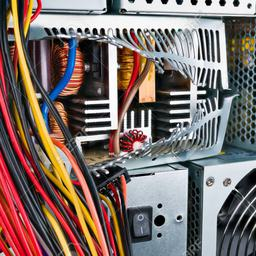

Images from folder 'case':
Image Path: /content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification/pc_parts/case/127.jpg


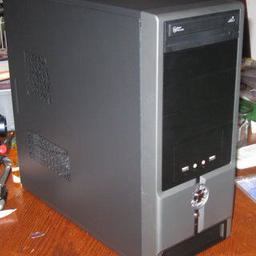

Images from folder 'cpu':
Image Path: /content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification/pc_parts/cpu/9.jpg


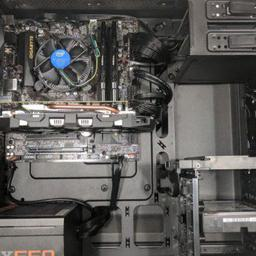

Images from folder 'gpu':
Image Path: /content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification/pc_parts/gpu/50.jpg


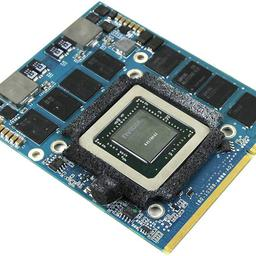

Images from folder 'hdd':
Image Path: /content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification/pc_parts/hdd/233.jpg


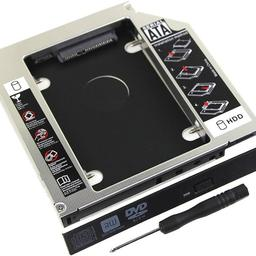

Images from folder 'headset':
Image Path: /content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification/pc_parts/headset/44.jpg


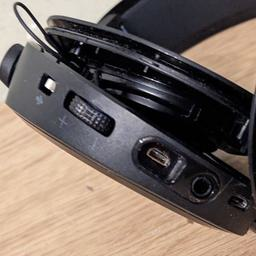

Images from folder 'keyboard':
Image Path: /content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification/pc_parts/keyboard/108.jpg


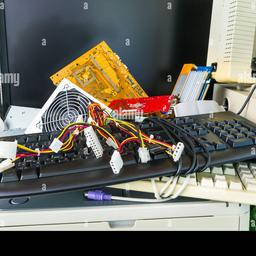

Images from folder 'microphone':
Image Path: /content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification/pc_parts/microphone/84.jpg


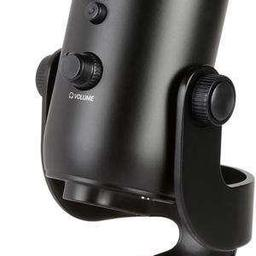

Images from folder 'monitor':
Image Path: /content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification/pc_parts/monitor/25.jpg


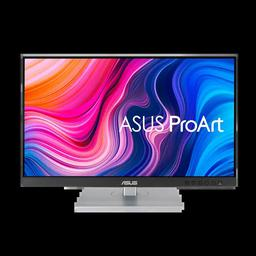

Images from folder 'motherboard':
Image Path: /content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification/pc_parts/motherboard/84.jpg


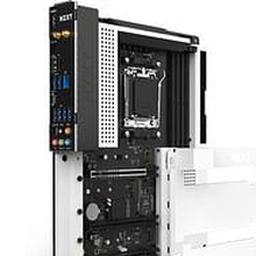

Images from folder 'mouse':
Image Path: /content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification/pc_parts/mouse/56.jpg


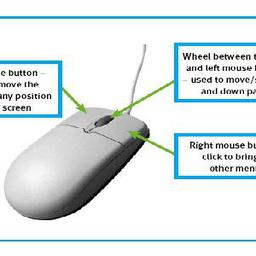

Images from folder 'ram':
Image Path: /content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification/pc_parts/ram/139.jpg


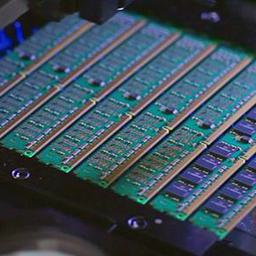

Images from folder 'speakers':
Image Path: /content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification/pc_parts/speakers/241.jpg


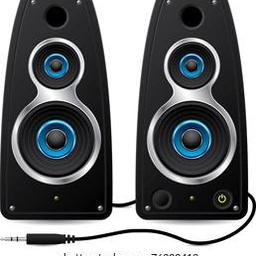

Images from folder 'webcam':
Image Path: /content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification/pc_parts/webcam/30.jpg


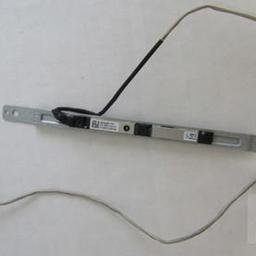

In [168]:
# Define the number of random images to display from each folder
num_images_per_folder = 1

# Iterate over the folders in the base path
for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)

    # Check if the path is a directory
    if os.path.isdir(folder_path):
        print(f"Images from folder '{folder_name}':")

        # List all files in the folder
        files = os.listdir(folder_path)

        # Shuffle the list of files
        random.shuffle(files)

        # Select a random subset of files
        random_files = files[:num_images_per_folder]

        # Display each random image
        for file_name in random_files:
            # Construct the path to the image file
            image_path = os.path.join(folder_path, file_name)

            # Read the image using OpenCV
            image = cv2.imread(image_path, cv2.COLOR_BGR2RGB)

            # Print the image path next to the displayed image
            print(f"Image Path: {image_path}")

            # Display the image
            cv2_imshow(image)

# Visualization Number of Files in Each Folder

In [169]:
count = []

for label in files_per_folder.keys():
  count.append(len(files_per_folder[label]))
  # print(f"{label} = {len(files_per_folder[label])}")

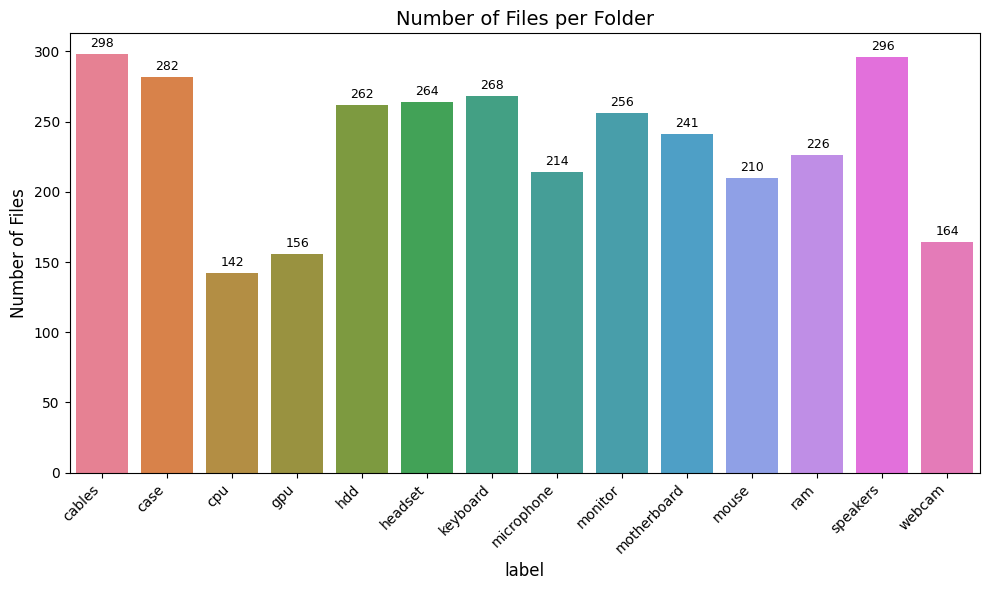

In [170]:
# Visualize the number of files per folder using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=count, hue=labels, dodge=False)
plt.xlabel('label', fontsize=12)
plt.ylabel('Number of Files', fontsize=12)
plt.title('Number of Files per Folder', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Displaying labels next to each bar
for i in range(len(count)):
    plt.text(i, count[i] + 5, count[i], ha='center', fontsize=9)

plt.show()

# Image Attributes

In [171]:
# Read image as gray scale.
img_1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification/pc_parts/headset/249.jpg", 0)

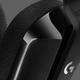

In [172]:
cv2_imshow(img_1[120:200, 120:200])

In [173]:
# Print the image data (pixel values), element of a 2D numpy array.
# Each pixel value is 8-bits [0,255]
print(img_1[120:200, 120:200])

[[100  99  98 ...  30  32  33]
 [ 97  97  98 ...  33  35  36]
 [ 92  94  97 ...  37  39  40]
 ...
 [ 33  33  33 ...  97  97  96]
 [ 31  30  31 ...  97  96  95]
 [ 28  28  29 ...  98  95  94]]


In [174]:
# print the size  of image
print("Image size (H, W) is:", img_1.shape)

# print data-type of image
print("Data type of image is:", img_1.dtype)

Image size (H, W) is: (256, 256)
Data type of image is: uint8


# Play With Image
Add Geometry and Text to images

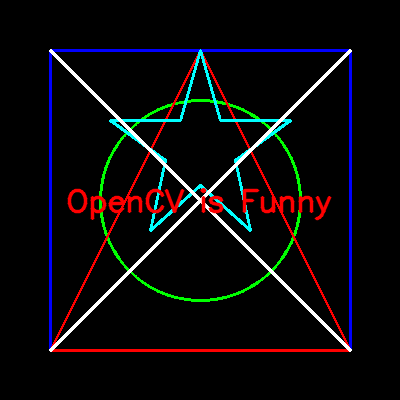

In [175]:
# Create a black background image
image = np.zeros((400, 400, 3), dtype=np.uint8)

# Draw a rectangle
cv2.rectangle(image, (50, 50), (350, 350), (255, 0, 0), 2)

# Draw a circle
cv2.circle(image, (200, 200), 100, (0, 255, 0), 2)

# Draw a triangle
pts = np.array([[200, 50], [50, 350], [350, 350]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(image, [pts], isClosed=True, color=(0, 0, 255), thickness=2)

# Draw a star
star_pts = np.array([[200, 50], [220, 120], [290, 120], [235, 160], [250, 230],
                     [200, 185], [150, 230], [165, 160], [110, 120], [180, 120]], np.int32)
star_pts = star_pts.reshape((-1, 1, 2))
cv2.polylines(image, [star_pts], isClosed=True, color=(255, 255, 0), thickness=2)

# Draw a straight diagonal line
cv2.line(image, (50, 50), (350, 350), (255, 255, 255), thickness=2)
cv2.line(image, [350, 50], (50, 350), (255, 255, 255), thickness=2)

# Add text
text = 'OpenCV is Funny'
font = cv2.FONT_HERSHEY_SIMPLEX
text_size = cv2.getTextSize(text, font, 1, 2)[0]
text_x = (image.shape[1] - text_size[0]) // 2  # Calculate horizontal position for center alignment
text_y = (image.shape[0] + text_size[1]) // 2  # Calculate vertical position for center alignment
cv2.putText(image, text, (text_x, text_y), font, 1, (0, 0, 255), 2, cv2.LINE_AA)

# Display the image
cv2_imshow(image)

# Image Processing

## Histogram in Images

In [176]:
# Path to the image
img_2_path = '/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification/pc_parts/monitor/147.jpg'

In [177]:
img_2_mpl = plt.imread(img_2_path)

In [178]:
img_2_cv2 = cv2.imread(img_2_path) #BGR

In [179]:
img_2_mpl.shape, img_2_cv2.shape

((256, 256, 3), (256, 256, 3))

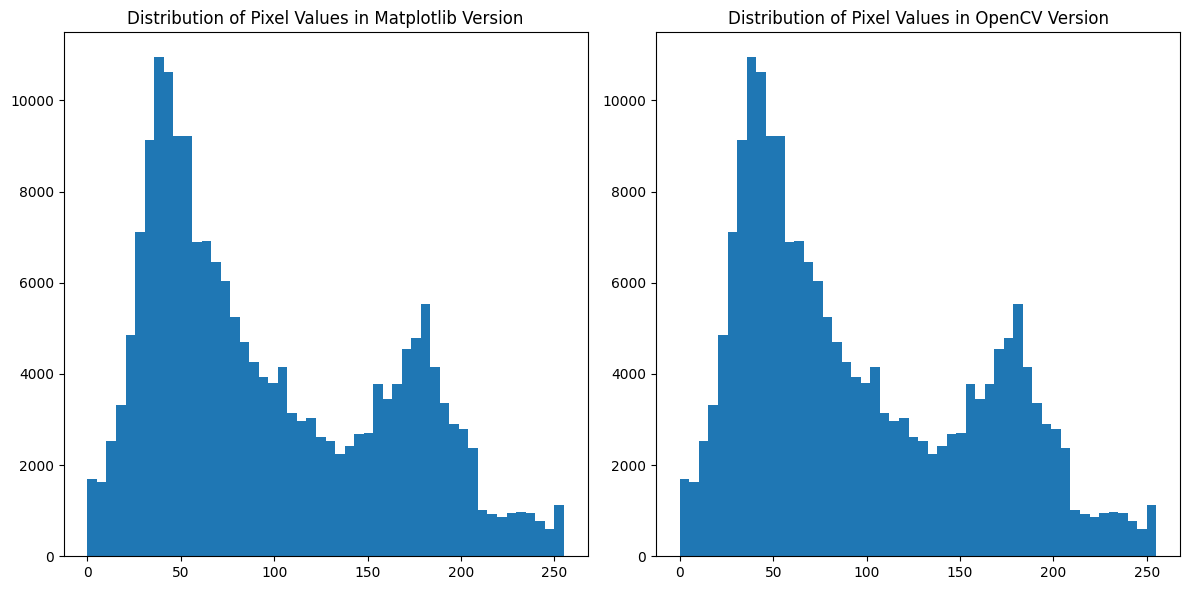

In [180]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Matplotlib version (img_2_mpl)
axs[0].hist(pd.Series(img_2_mpl.flatten()), bins=50)
axs[0].set_title('Distribution of Pixel Values in Matplotlib Version')

# OpenCV version (img_2_cv2)
axs[1].hist(pd.Series(img_2_cv2.flatten()), bins=50)
axs[1].set_title('Distribution of Pixel Values in OpenCV Version')

plt.tight_layout()
plt.show()

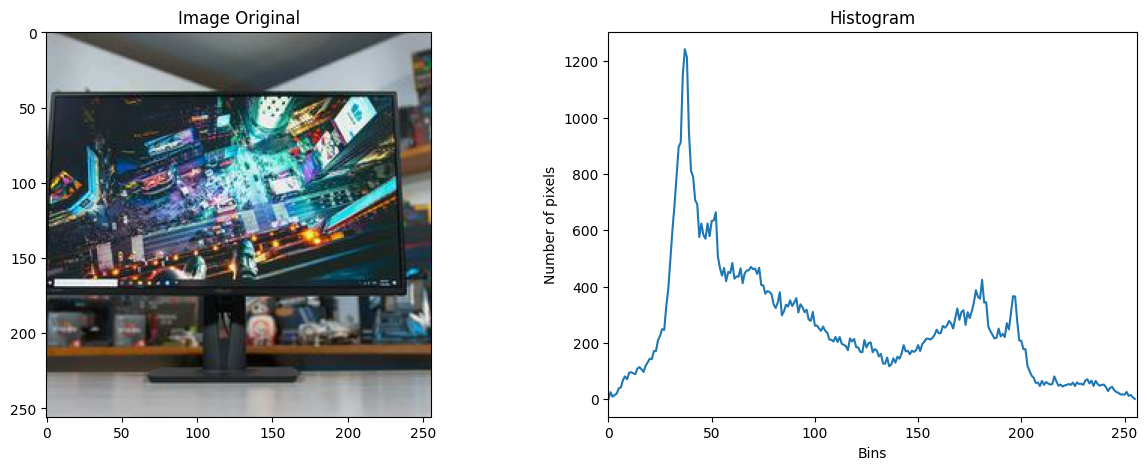

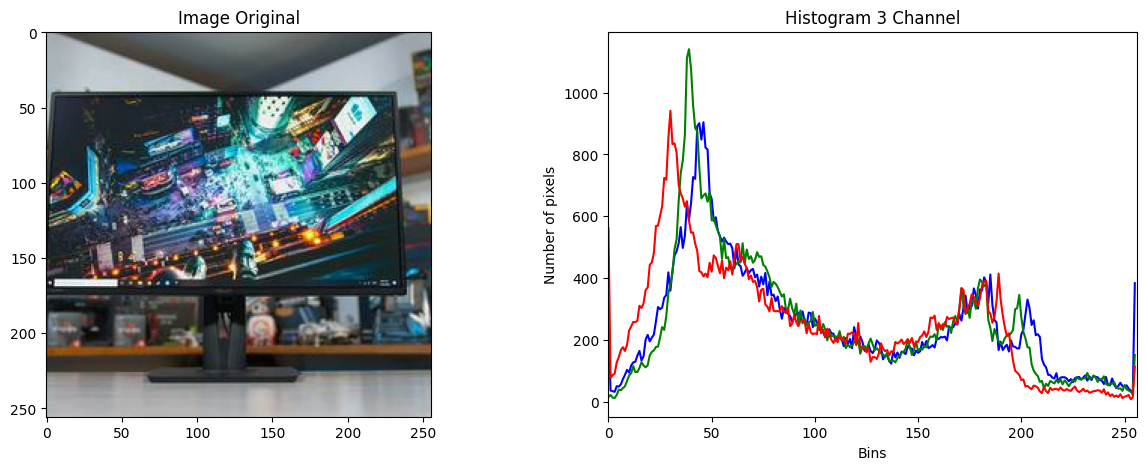

In [181]:
gray_image_2 = cv2.cvtColor(img_2_cv2, cv2.COLOR_BGR2GRAY)
#arguments
#images list - pass in the images
#channels list - specify the channels for which the hist need to be calculated
#mask - calc hist only for mask region
#histsize - size or number of bins
#range - possible pixel value - [0,256] for RGB and different values for HSV
hist_image_2 = cv2.calcHist([gray_image_2],[0],None,[256],[0,256])

fig,ax = plt.subplots(1,2 , figsize=(15,5))
ax[0].imshow(cv2.cvtColor(img_2_cv2, cv2.COLOR_BGR2RGB))
ax[0].set_title("Image Original")

ax[1].plot(hist_image_2)
ax[1].set_title("Histogram")
ax[1].set_xlabel("Bins")
ax[1].set_ylabel("Number of pixels")
ax[1].set_xlim([0,256])



split_channels_image_2 = cv2.split(img_2_cv2)
colors = ("b" , "g" ,"r")

fig,ax = plt.subplots(1,2 , figsize=(15,5))
ax[0].imshow(cv2.cvtColor(img_2_cv2, cv2.COLOR_BGR2RGB))
ax[0].set_title("Image Original")

ax[1].set_title("Histogram 3 Channel")
ax[1].set_xlabel("Bins")
ax[1].set_ylabel("Number of pixels")
ax[1].set_xlim([0,256])
for (chan, col) in zip(split_channels_image_2, colors):
    hist = cv2.calcHist([chan],[0], None,[256],[0,256])
    ax[1].plot(hist,color = col)

## Diff Between OpenCV and Matplotlib

- dalam OpenCV (cv2), format default untuk penyimpanan warna adalah BGR (Blue-Green-Red),
- sedangkan dalam matplotlib (plt), format default adalah RGB (Red-Green-Blue)

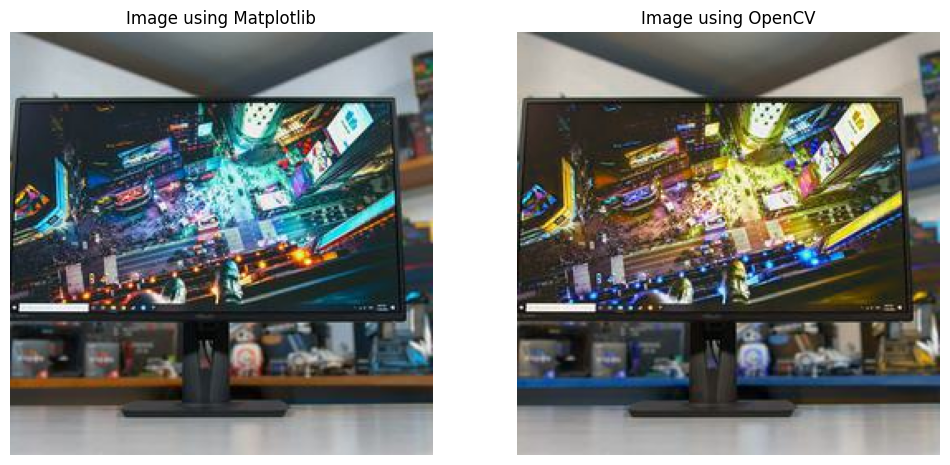

In [182]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Convert BGR to RGB
img_2_cv2_rgb = cv2.cvtColor(img_2_cv2, cv2.COLOR_BGR2RGB) #RGB

# Display using OpenCV on the left subplot
ax1.imshow(img_2_cv2_rgb)
ax1.axis('off')  # Hide axes
ax1.set_title('Image using Matplotlib')

# Display using matplotlib on the right subplot
ax2.imshow(img_2_cv2)
ax2.axis('off')  # Hide axes
ax2.set_title('Image using OpenCV')

plt.show()

## Image is separated by their respective color channels

it's mean RGB (Red Channel, Green Channel, and Blue Channel)

In [183]:
# Path to the image
img_3_path = '/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification/pc_parts/monitor/138.jpg'
img_3_cv2_rgb = cv2.imread(img_3_path, cv2.IMREAD_COLOR)

Text(0.5, 1.0, 'Blue Channel')

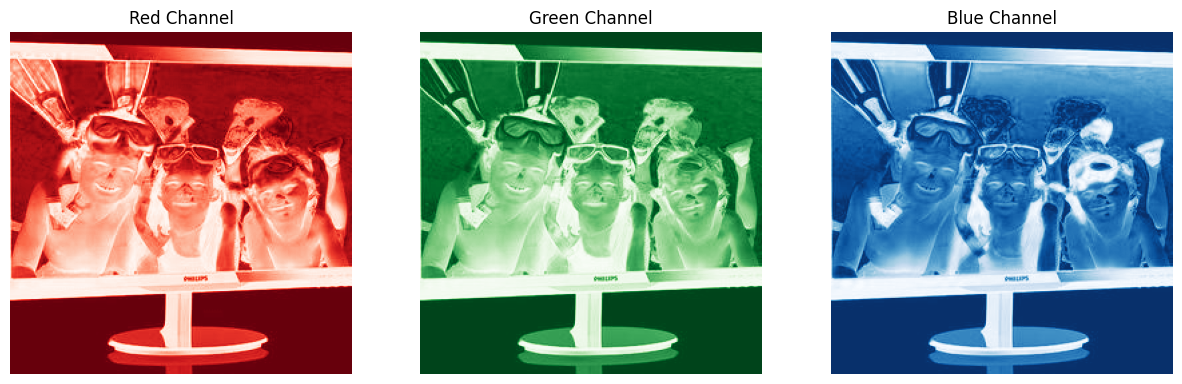

In [184]:
# Display RGB Channels of our image

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_3_cv2_rgb[:, :, 0], cmap='Reds')
axs[1].imshow(img_3_cv2_rgb[:, :, 1], cmap='Greens')
axs[2].imshow(img_3_cv2_rgb[:, :, 2], cmap='Blues')

axs[0].axis("off")
axs[1].axis("off")
axs[2].axis("off")

axs[0].set_title("Red Channel")
axs[1].set_title("Green Channel")
axs[2].set_title("Blue Channel")

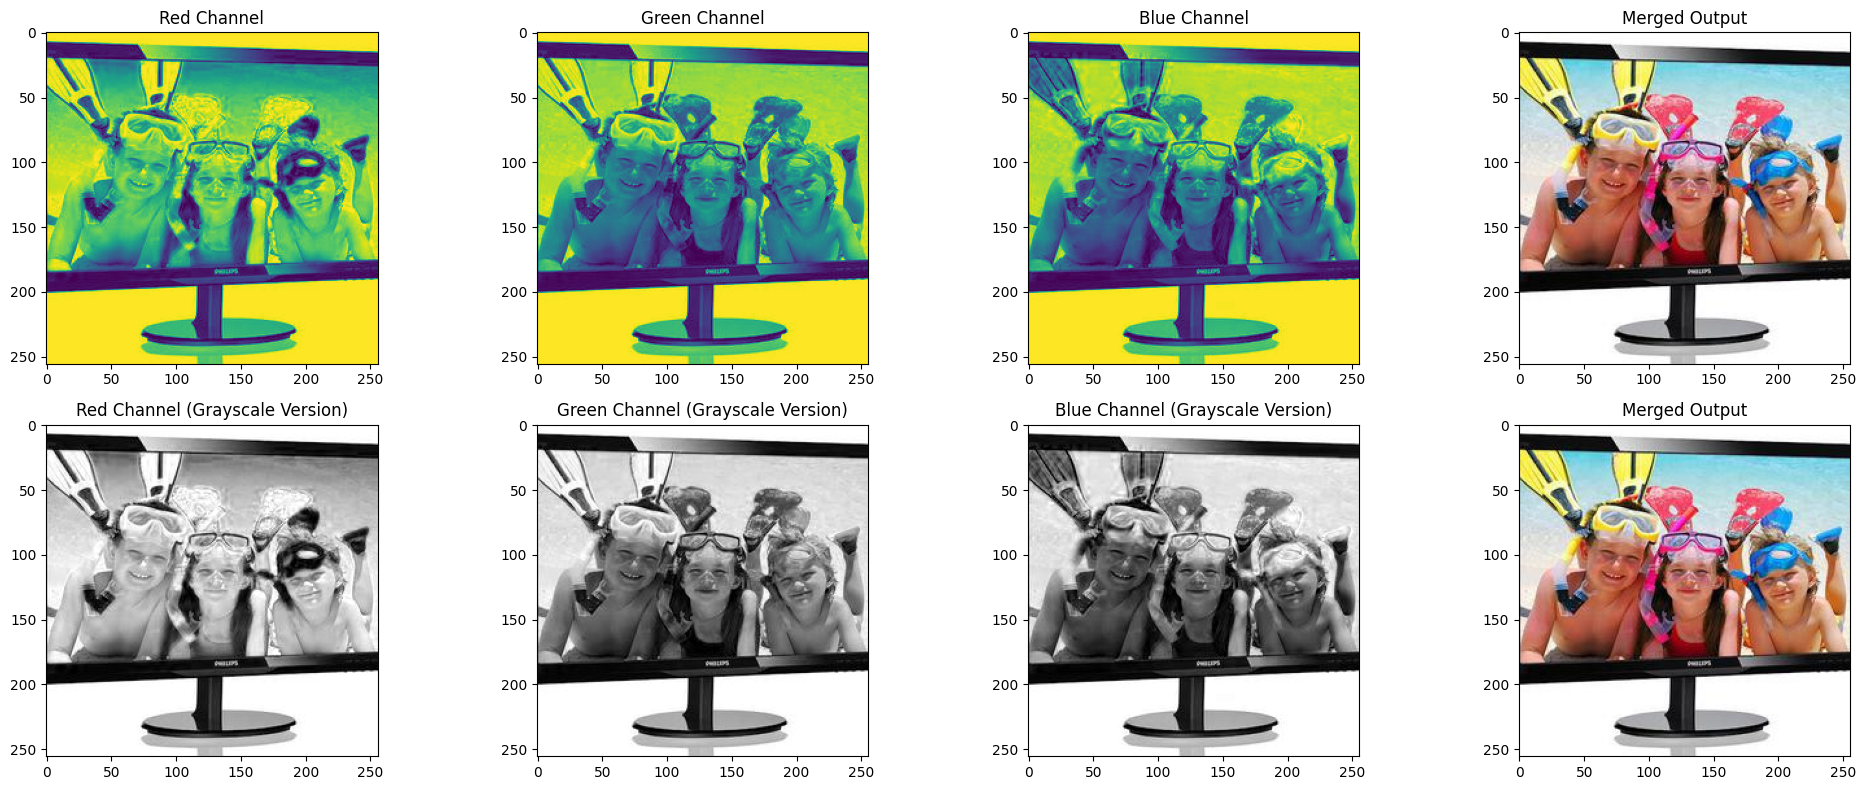

In [185]:
# Split the image into the B,G,R components
b, g, r = cv2.split(img_3_cv2_rgb)

# Create a figure with subplots
plt.figure(figsize=[20, 8])

# Plot the red channel
plt.subplot(2, 4, 1)
plt.imshow(r)
plt.title("Red Channel")

# Plot the green channel
plt.subplot(2, 4, 2)
plt.imshow(g)
plt.title("Green Channel")

# Plot the blue channel
plt.subplot(2, 4, 3)
plt.imshow(b)
plt.title("Blue Channel")

# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b, g, r))

# Plot the merged output
plt.subplot(2, 4, 4)
plt.imshow(imgMerged[:, :, ::-1])
plt.title("Merged Output")

# Plot the red channel again for comparison
plt.subplot(2, 4, 5)
plt.imshow(r, cmap="gray")
plt.title("Red Channel (Grayscale Version)")

# Plot the green channel again for comparison
plt.subplot(2, 4, 6)
plt.imshow(g, cmap="gray")
plt.title("Green Channel (Grayscale Version)")

# Plot the blue channel again for comparison
plt.subplot(2, 4, 7)
plt.imshow(b, cmap="gray")
plt.title("Blue Channel (Grayscale Version)")

# Plot the merged output again for comparison
plt.subplot(2, 4, 8)
plt.imshow(imgMerged[:, :, ::-1])
plt.title("Merged Output")

plt.tight_layout()
plt.show()

## Changing to HSV color space

it's mean Hue Saturated Value

In [186]:
# Path to the image
img_4_path = '/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification/pc_parts/mouse/63.jpg'

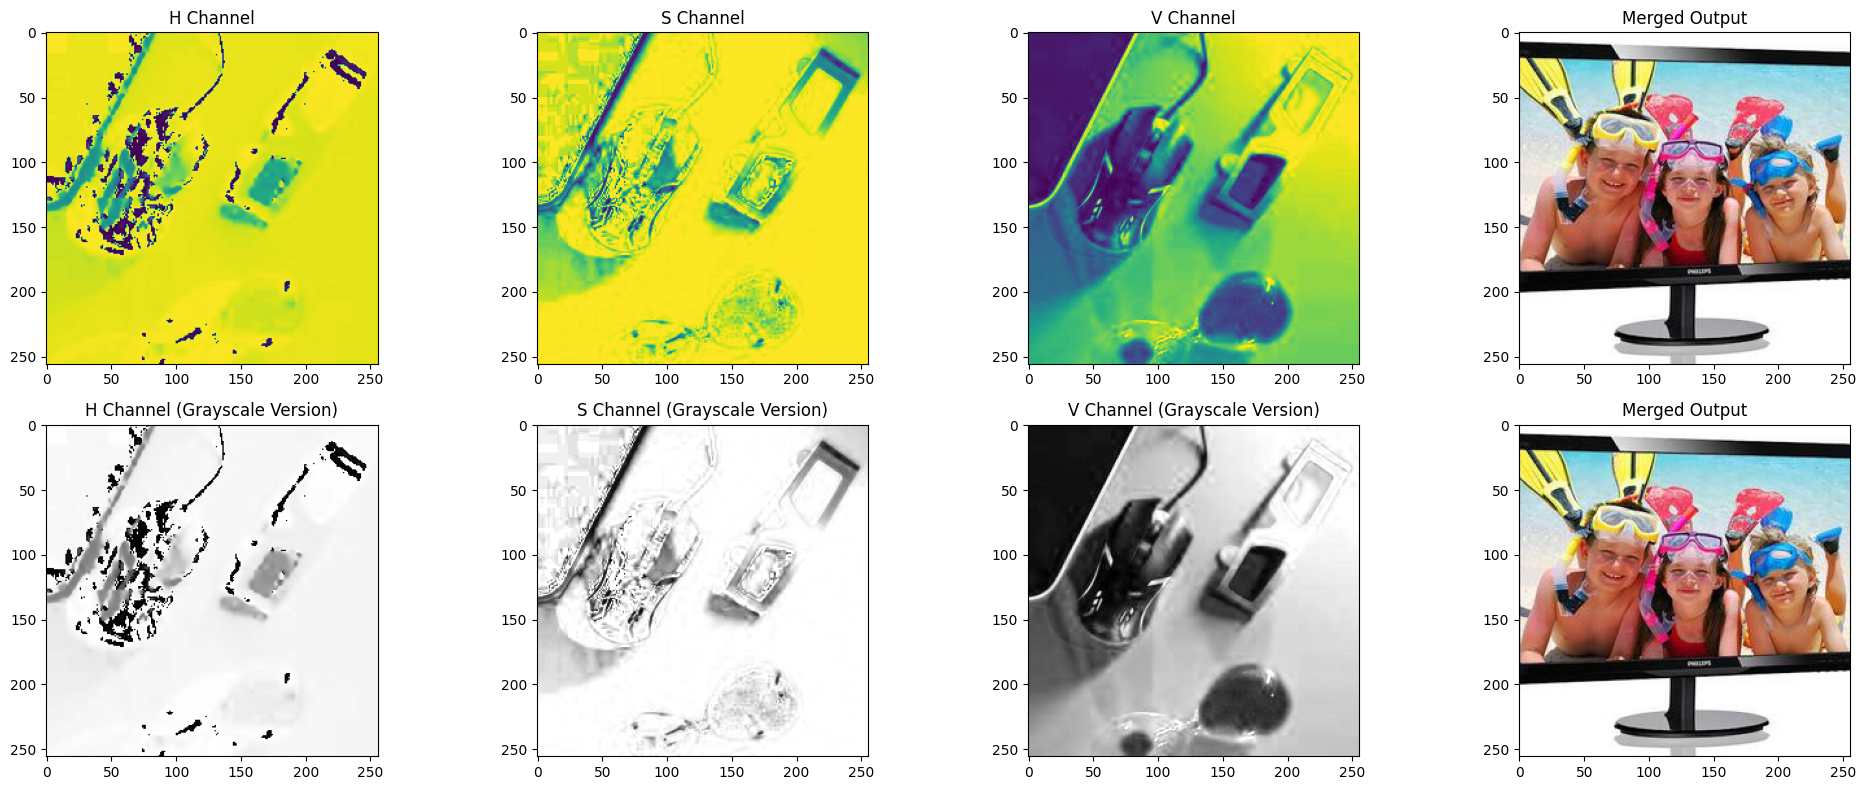

In [187]:
# Read the image using OpenCV
img_4_cv2 = cv2.imread(img_4_path)

# Convert the image to HSV color space
img_4_hsv = cv2.cvtColor(img_4_cv2, cv2.COLOR_BGR2HSV)

# Split the image into the H, S, V components
h, s, v = cv2.split(img_4_hsv)

# Create a figure with subplots
plt.figure(figsize=[20, 8])

# Plot the red channel
plt.subplot(2, 4, 1)
plt.imshow(h)
plt.title("H Channel")

# Plot the green channel
plt.subplot(2, 4, 2)
plt.imshow(s)
plt.title("S Channel")

# Plot the blue channel
plt.subplot(2, 4, 3)
plt.imshow(v)
plt.title("V Channel")

# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b, g, r))

# Plot the merged output
plt.subplot(2, 4, 4)
plt.imshow(imgMerged[:, :, ::-1])
plt.title("Merged Output")

# Plot the red channel again for comparison
plt.subplot(2, 4, 5)
plt.imshow(h, cmap="gray")
plt.title("H Channel (Grayscale Version)")

# Plot the green channel again for comparison
plt.subplot(2, 4, 6)
plt.imshow(s, cmap="gray")
plt.title("S Channel (Grayscale Version)")

# Plot the blue channel again for comparison
plt.subplot(2, 4, 7)
plt.imshow(v, cmap="gray")
plt.title("V Channel (Grayscale Version)")

# Plot the merged output again for comparison
plt.subplot(2, 4, 8)
plt.imshow(imgMerged[:, :, ::-1])
plt.title("Merged Output")

plt.tight_layout()
plt.show()

## Play with Rotate and Flip in image

In [188]:
# Path to the image
img_5_path = '/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification/pc_parts/motherboard/2.jpg'

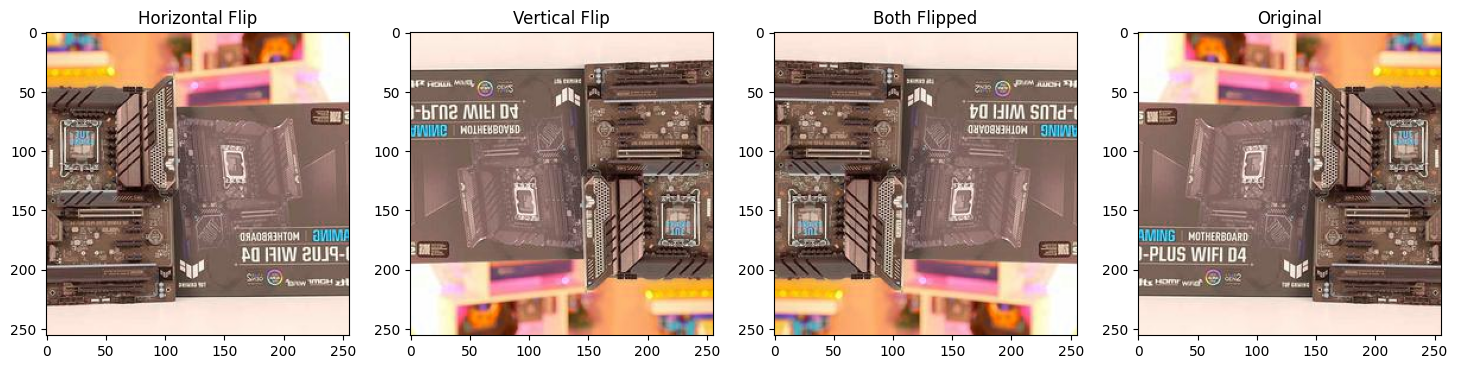

In [189]:
img_5_cv2_rgb = cv2.imread(img_5_path, cv2.IMREAD_COLOR)

img_5_cv2_rgb_flipped_horz = cv2.flip(img_5_cv2_rgb, 1)
img_5_cv2_rgb_flipped_vert = cv2.flip(img_5_cv2_rgb, 0)
img_5_cv2_rgb_flipped_both = cv2.flip(img_5_cv2_rgb, -1)

# Show the images
plt.figure(figsize=(18, 5))
plt.subplot(141);plt.imshow(img_5_cv2_rgb_flipped_horz);plt.title("Horizontal Flip");
plt.subplot(142);plt.imshow(img_5_cv2_rgb_flipped_vert);plt.title("Vertical Flip");
plt.subplot(143);plt.imshow(img_5_cv2_rgb_flipped_both);plt.title("Both Flipped");
plt.subplot(144);plt.imshow(img_5_cv2_rgb);plt.title("Original");

## Operasi Bitwise NOT(Negasi) untuk membuat gambar negatif

In [190]:
# Path to the image
img_6_path = '/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification/pc_parts/mouse/5.jpg'

In [191]:
# Load the image in color
img_6_color = cv2.imread(img_6_path)

# Convert the image to grayscale
img_6_gray = cv2.cvtColor(img_6_color, cv2.COLOR_BGR2GRAY)

# Negate the image
img_6_negated = cv2.bitwise_not(img_6_gray)

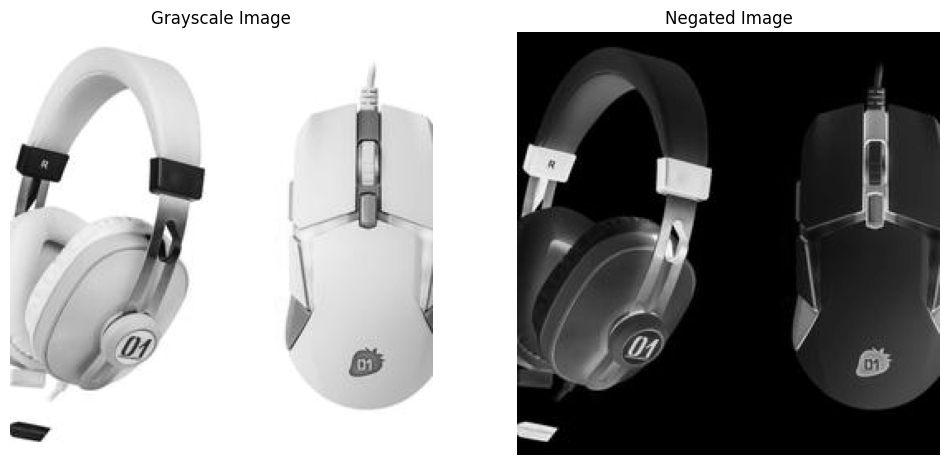

In [192]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Display the grayscale image on the left subplot
ax1.imshow(img_6_gray, cmap='gray')
ax1.axis('off')
ax1.set_title('Grayscale Image')

# Display the negated image on the right subplot
ax2.imshow(img_6_negated, cmap='gray')
ax2.axis('off')
ax2.set_title('Negated Image')

plt.show()

## Image Manipulation

In [193]:
# Path to the image
img_7_path = '/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification/pc_parts/case/87.jpg'

# Read the image
img_7 = cv2.imread(img_7_path)

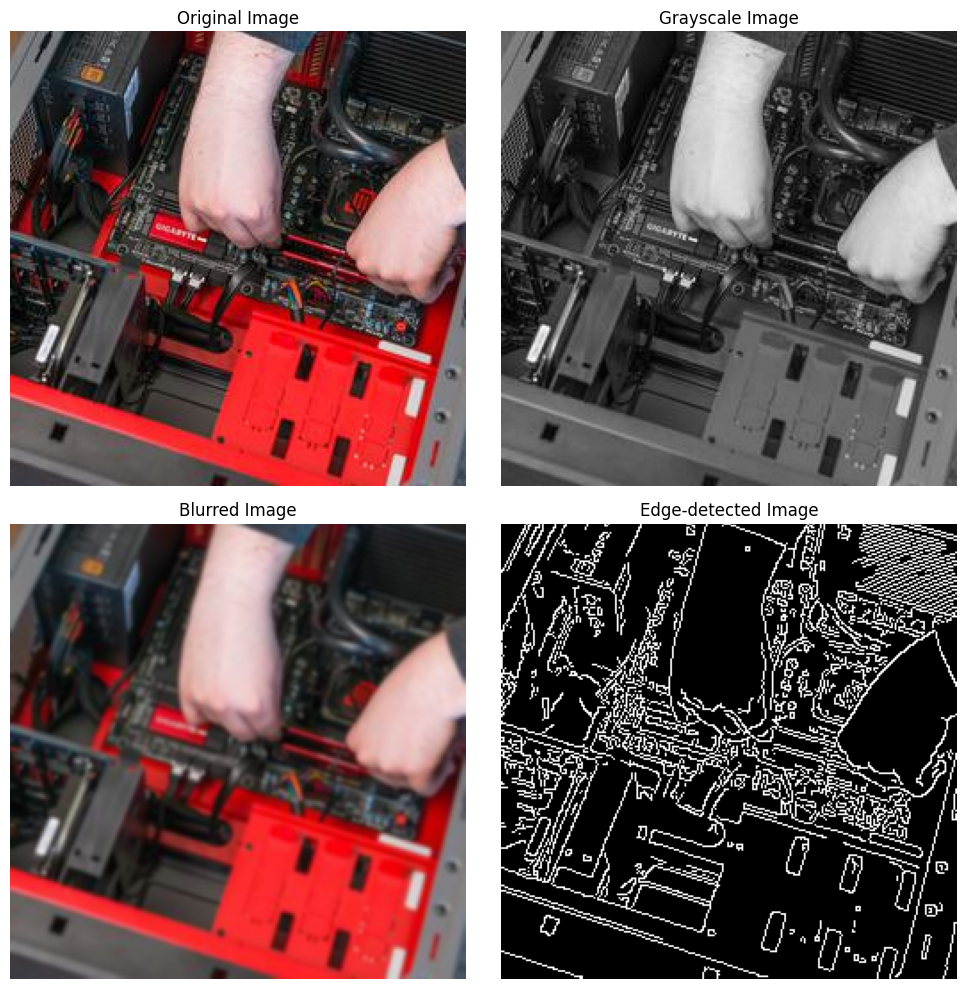

In [194]:
# Convert the image to grayscale
gray_image_7 = cv2.cvtColor(img_7, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred_image_7 = cv2.GaussianBlur(img_7, (5, 5), 0)

# Edge detection using Canny
edges_image_7 = cv2.Canny(gray_image_7, 100, 200)

# Resize the image
resized_image = cv2.resize(img_7, (300, 300))

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot original image
axes[0, 0].imshow(cv2.cvtColor(img_7, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Plot grayscale image
axes[0, 1].imshow(gray_image_7, cmap='gray')
axes[0, 1].set_title('Grayscale Image')
axes[0, 1].axis('off')

# Plot blurred image
axes[1, 0].imshow(cv2.cvtColor(blurred_image_7, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Blurred Image')
axes[1, 0].axis('off')

# Plot edge-detected image
axes[1, 1].imshow(edges_image_7, cmap='gray')
axes[1, 1].set_title('Edge-detected Image')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

## Open CV Arithmetic

In [195]:
img_7_path = '/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Computer Vision - Open CV/Final Project [Enrollment]/Image Processing/pc-parts-images-dataset-classification/pc_parts/headset/80.jpg'

In [196]:
img_7 = cv2.imread(img_7_path)

In [197]:
#Lets first build a matrix of same shape as image with values of 100
filter_matrix = np.ones(img_7.shape,dtype="uint8") * 50 #matrix with 100 as values with the same shape as image

In [198]:
#Open CV
cv2_add = cv2.add(img_7, filter_matrix) # Menambahkan matriks filter ke setiap piksel dalam gambar. (addition)
cv2_sub = cv2.subtract(img_7, filter_matrix) # Mengurangkan matriks filter dari setiap piksel dalam gambar. (subtraction)
#Numpy
np_add = np.add(img_7, filter_matrix) # Menambahkan elemen matriks filter ke setiap piksel dalam gambar. (addition)
np_sub = np.subtract(img_7, filter_matrix) # Mengurangkan elemen matriks filter dari setiap piksel dalam gambar. (subtraction)

Text(0.5, 1.0, 'Numpy sub 100')

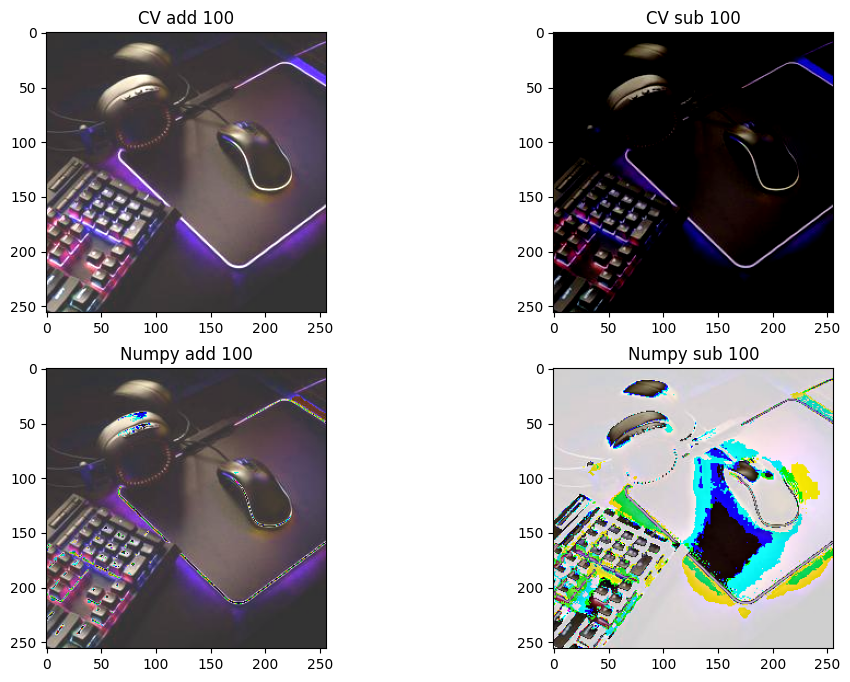

In [199]:
fig,ax = plt.subplots(2,2,figsize=(12,8))
ax[0,0].imshow(cv2_add)
ax[0,0].set_title("CV add 100")
ax[0,1].imshow(cv2_sub)
ax[0,1].set_title("CV sub 100")
ax[1,0].imshow(np_add)
ax[1,0].set_title("Numpy add 100")
ax[1,1].imshow(np_sub)
ax[1,1].set_title("Numpy sub 100")

## Bitwise Operations in Image

Some of the bitwise operators are AND, OR, XOR and NOT, which may seem simple operations but useful for masking. Bitwise operations turn off when the values are zero and turn on when values are greater than zero

In [200]:
def convert_BGR_to_RGB(image):
    # OpenCV reads images in BGR format by default
    # Convert the BGR image to RGB format
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(-0.5, 299.5, 299.5, -0.5)

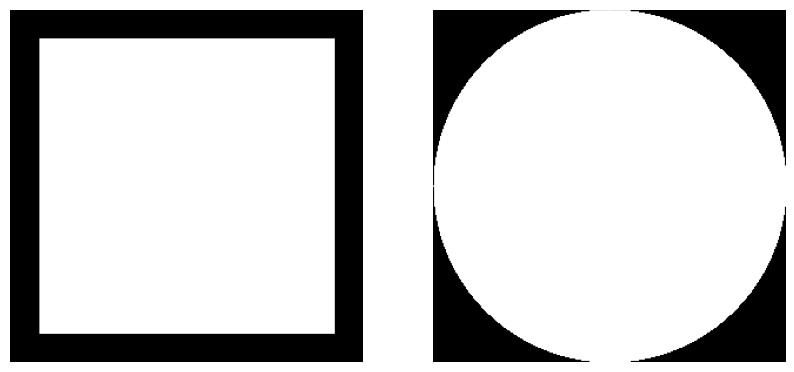

In [201]:
#create image data
rect = np.zeros((300,300) , dtype="uint8")
cv2.rectangle(rect,(25,25),(275,275), 255, -1) # 250 by 250 rectangle , white color as fill color
rect = convert_BGR_to_RGB(rect)

cir = np.zeros((300,300) ,dtype="uint8")
cv2.circle(cir,(150,150),150,255,-1) # Circle in center 150,150 pnt, radius - 100 and white color as fill color, thickness = 1
cir = convert_BGR_to_RGB(cir)

#Plot
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(rect)
ax[0].axis("off")
ax[1].imshow(cir)
ax[1].axis("off")

Text(0.5, 1.0, 'NOT')

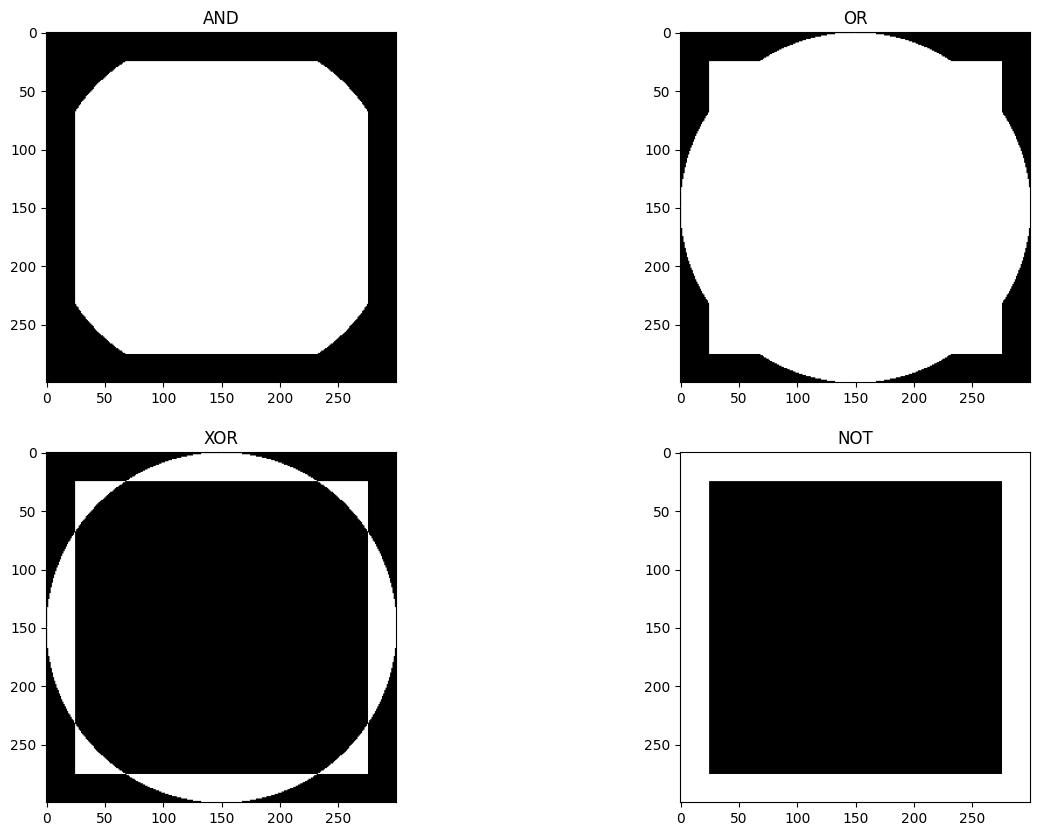

In [202]:
# Bitwise operations
cv2_and = cv2.bitwise_and(rect,cir) #AND if both are greather than zero - on else -off
cv2_and = convert_BGR_to_RGB(cv2_and)

cv2_or = cv2.bitwise_or(rect,cir) #OR - either of the two is greater than zero -on else off
cv2_or = convert_BGR_to_RGB(cv2_or)

cv2_xor = cv2.bitwise_xor(rect,cir) #XOR - either of the two is greater than zero but not both -on else off
cv2_xor = convert_BGR_to_RGB(cv2_xor)

cv2_not = cv2.bitwise_not(rect) #NOT - invert on to off and viceversa
cv2_not = convert_BGR_to_RGB(cv2_not)

fig,ax = plt.subplots(2,2,figsize=(15,10))
ax[0,0].imshow(cv2_and)
ax[0,0].set_title("AND")
ax[0,1].imshow(cv2_or)
ax[0,1].set_title("OR")
ax[1,0].imshow(cv2_xor)
ax[1,0].set_title("XOR")
ax[1,1].imshow(cv2_not)
ax[1,1].set_title("NOT")

Refrensi:

1. https://www.kaggle.com/code/lokeshkumarn/open-cv-tutorials
2. https://www.kaggle.com/code/jeyasrisenthil/open-cv-notebook
3. https://www.kaggle.com/code/ayushsaklani/open-cv-image-processing
4. https://www.kaggle.com/code/sonukiller99/open-cv-for-beginners
5. https://www.kaggle.com/code/shivamanhar/open-cv2-basic#Contours?